In [1]:
import os
import glob
import matplotlib
import numpy as np
from numpy import array
import pandas as pd
import warnings
import math
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score as r2, mean_squared_error
# 忽略警告
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score as r2

In [2]:
df = pd.read_csv('../../Data/ProcessedData/sorted_58606.csv',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,58606,2840.00,11558.0,264.0,1951,12,1,11.2,4.0,0.00,4.0,88.0,0.0,0.8903
1,58606,2840.00,11558.0,264.0,1951,12,2,14.0,8.0,0.00,4.4,83.0,0.0,1.2308
2,58606,2840.00,11558.0,264.0,1951,12,3,15.1,8.7,0.50,7.0,75.0,0.0,1.8942
3,58606,2840.00,11558.0,264.0,1951,12,4,13.8,4.8,8.10,6.2,78.0,0.0,1.7360
4,58606,2840.00,11558.0,264.0,1951,12,5,11.4,2.3,7.50,3.3,71.0,0.0,1.5499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24525,58606,28.58,115.9,47.2,2021,8,27,30.5,23.1,2.20,2.1,85.0,31.5,2.8778
24526,58606,28.58,115.9,47.2,2021,8,28,32.7,24.6,3.90,1.0,80.5,999990.0,3.3582
24527,58606,28.58,115.9,47.2,2021,8,29,34.4,26.0,7.35,1.3,76.3,0.0,4.4921
24528,58606,28.58,115.9,47.2,2021,8,30,35.4,27.7,8.10,1.3,74.0,999990.0,4.8488


In [4]:
df = df.iloc[:,7:]

In [5]:
df

,7,8,9,10,11,12,13
0,11.2,4.0,0.00,4.0,88.0,0.0,0.8903
1,14.0,8.0,0.00,4.4,83.0,0.0,1.2308
2,15.1,8.7,0.50,7.0,75.0,0.0,1.8942
3,13.8,4.8,8.10,6.2,78.0,0.0,1.7360
4,11.4,2.3,7.50,3.3,71.0,0.0,1.5499
...,...,...,...,...,...,...,...
24525,30.5,23.1,2.20,2.1,85.0,31.5,2.8778
24526,32.7,24.6,3.90,1.0,80.5,999990.0,3.3582
24527,34.4,26.0,7.35,1.3,76.3,0.0,4.4921
24528,35.4,27.7,8.10,1.3,74.0,999990.0,4.8488


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(df)

In [7]:
scaler_data_len = len(df.columns)

In [8]:
def splitData(var,per_test):
    num_test=int(len(var)*per_test)
    train_size=int(len(var)-num_test)
    train_data=var[0:train_size]
    test_data=var[train_size:train_size+num_test]
    return train_data,test_data

In [9]:
train,test = splitData(dataset,0.2)

In [10]:
print('train_len:',len(train),'test_len:',len(test))

train_len: 19624 test_len: 4906


In [11]:
train.shape[1]

7

In [12]:
train[0:10]

array([[0.33932584, 0.33171913, 0.        , 0.25806452, 0.84810127,
        0.        , 0.07013357],
       [0.40224719, 0.42857143, 0.        , 0.28387097, 0.78481013,
        0.        , 0.10981269],
       [0.42696629, 0.44552058, 0.03787879, 0.4516129 , 0.6835443 ,
        0.        , 0.18711996],
       [0.39775281, 0.35108959, 0.61363636, 0.4       , 0.72151899,
        0.        , 0.16868461],
       [0.34382022, 0.2905569 , 0.56818182, 0.21290323, 0.63291139,
        0.        , 0.14699802],
       [0.4247191 , 0.23486683, 0.67424242, 0.10322581, 0.78481013,
        0.        , 0.11552275],
       [0.40674157, 0.28329298, 0.67424242, 0.11612903, 0.75949367,
        0.        , 0.1211629 ],
       [0.44494382, 0.24697337, 0.58333333, 0.07741935, 0.83544304,
        0.        , 0.10474355],
       [0.50561798, 0.31234867, 0.71969697, 0.12258065, 0.75949367,
        0.        , 0.14642701],
       [0.50561798, 0.29782082, 0.6969697 , 0.10967742, 0.78481013,
        0.        , 0.1

In [13]:
train[0:3,0:7]

array([[0.33932584, 0.33171913, 0.        , 0.25806452, 0.84810127,
        0.        , 0.07013357],
       [0.40224719, 0.42857143, 0.        , 0.28387097, 0.78481013,
        0.        , 0.10981269],
       [0.42696629, 0.44552058, 0.03787879, 0.4516129 , 0.6835443 ,
        0.        , 0.18711996]])

In [14]:
train[3:4,6]

array([0.16868461])

### 1day - prediction - 1day (1d-p-1d)

In [15]:
# def createXY(data,n_past):
#     dataX = []
#     dataY = []
#     for i in range(n_past,len(data)):
#         dataX.append(data[i-n_past:i,0:data.shape[1]])
#
#         dataY.append(data[i,6])
#     return np.array(dataX),np.array(dataY)
def createXY(data,n_past,n_steps_out):
    dataX,dataY = list(),list()
    for i in range(len(data)):
        ## such as: len(data) = 19624
        end_ix = i + n_past ## 0+3=3,1+3=4,...,19618+3=19621
        out_end_ix = end_ix + n_steps_out ## 3+3=6,4+3=7,...,19621+3=19624
        # print('out_end_ix:',out_end_ix)
        '''
        加入此处判断，使得最终的dataX和dataY中每行的数组长度一致，进而可以转换为array(数组),如若不加以限制，
        则导致最后几次循环由于i是在len(data)范围内的，
        但是由于out_end_ix=end_ix + n_steps_out,最终会超出data的数据范围，而导致其无法获取到数据,
        加入dataY之后，最后几行的数据长度是和前面的数据长度不一致，最终导致无法进行array转换
        '''
        if out_end_ix > len(data): ## 6 < len(data),7<len(data),...,19623+3=19626>len(data)=19624
            # print("------------out_end_ix of end",out_end_ix,'---------------')
            break

        dataX.append(data[i:end_ix,0:data.shape[1]]) ## 0:3,0:7;1:4,0:7
        dataY.append(data[end_ix:out_end_ix,6]) ##3:6,6;4:7,6
    return array(dataX),array(dataY)

In [16]:
n_past = 1
n_output=1
trainX,trainY = createXY(train,n_past,n_output)
testX,testY = createXY(test,n_past,n_output)

In [17]:
print('train Shape---', trainX.shape)
print('trainY Shape---', trainY.shape)
print('testX Shape---', testX.shape)
print('testY Shape---', testY.shape)

train Shape--- (19623, 1, 7)
trainY Shape--- (19623, 1)
testX Shape--- (4905, 1, 7)
testY Shape--- (4905, 1)


In [18]:
trainX = trainX.reshape(trainX.shape[0],-1)

trainX.shape


(19623, 7)

In [19]:
testX = testX.reshape(testX.shape[0],-1)

testX.shape


(4905, 7)

In [20]:
# # Flatten trainY and testY to 1D arrays
trainY = trainY.flatten()
testY = testY.flatten()

In [21]:
print('train Shape---', trainX.shape)
print('trainY Shape---', trainY.shape)
print('testX Shape---', testX.shape)
print('testY Shape---', testY.shape)

train Shape--- (19623, 7)
trainY Shape--- (19623,)
testX Shape--- (4905, 7)
testY Shape--- (4905,)


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=50, max_features=1.0,
                              min_samples_leaf=10)
model.fit(trainX, trainY)

RandomForestRegressor(min_samples_leaf=10, n_jobs=-1, oob_score=True,
                      random_state=50)

In [23]:
pre = model.predict(testX)

In [24]:
predictions = np.array(pre).reshape(-1,1)

In [25]:
predictions

array([[0.7098374 ],
       [0.50608858],
       [0.43633777],
       ...,
       [0.45431442],
       [0.50905703],
       [0.5338712 ]])

In [26]:
prediction_copies_array = np.repeat(predictions,scaler_data_len,axis = -1) #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复7次，并将

In [27]:
prediction_copies_array

array([[0.7098374 , 0.7098374 , 0.7098374 , ..., 0.7098374 , 0.7098374 ,
        0.7098374 ],
       [0.50608858, 0.50608858, 0.50608858, ..., 0.50608858, 0.50608858,
        0.50608858],
       [0.43633777, 0.43633777, 0.43633777, ..., 0.43633777, 0.43633777,
        0.43633777],
       ...,
       [0.45431442, 0.45431442, 0.45431442, ..., 0.45431442, 0.45431442,
        0.45431442],
       [0.50905703, 0.50905703, 0.50905703, ..., 0.50905703, 0.50905703,
        0.50905703],
       [0.5338712 , 0.5338712 , 0.5338712 , ..., 0.5338712 , 0.5338712 ,
        0.5338712 ]])

In [28]:
pre_inverse = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction_copies_array),scaler_data_len)))

In [29]:
pre_inverse

array([[2.76877645e+01, 1.96162848e+01, 9.36985375e+00, ...,
        7.70771550e+01, 7.09837405e+05, 6.37981612e+00],
       [1.86209417e+01, 1.12014582e+01, 6.68036921e+00, ...,
        6.09809976e+01, 5.06088577e+05, 4.63137815e+00],
       [1.55170309e+01, 8.32075004e+00, 5.75965861e+00, ...,
        5.54706841e+01, 4.36337773e+05, 4.03282279e+00],
       ...,
       [1.63169919e+01, 9.06318574e+00, 5.99695041e+00, ...,
        5.68908396e+01, 4.54314425e+05, 4.18708655e+00],
       [1.87530379e+01, 1.13240554e+01, 6.71955280e+00, ...,
        6.12155054e+01, 5.09057031e+05, 4.65685146e+00],
       [1.98572685e+01, 1.23488806e+01, 7.04709987e+00, ...,
        6.31758250e+01, 5.33871202e+05, 4.86979030e+00]])

In [30]:
pred = pre_inverse[:,6]

In [31]:
pred

array([6.37981612, 4.63137815, 4.03282279, ..., 4.18708655, 4.65685146,
       4.8697903 ])

In [32]:
test_data = np.array(testY).reshape(-1, 1)

In [33]:
test_data

array([[0.5428686 ],
       [0.40920649],
       [0.59428248],
       ...,
       [0.48985823],
       [0.53142516],
       [0.63989307]])

In [34]:
# copies_test_data = np.repeat(test_data, trainX.shape[1],axis=-1)  # 将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将
copies_test_data = np.repeat(test_data, scaler_data_len, axis=-1)  # 将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

In [35]:
copies_test_data

array([[0.5428686 , 0.5428686 , 0.5428686 , ..., 0.5428686 , 0.5428686 ,
        0.5428686 ],
       [0.40920649, 0.40920649, 0.40920649, ..., 0.40920649, 0.40920649,
        0.40920649],
       [0.59428248, 0.59428248, 0.59428248, ..., 0.59428248, 0.59428248,
        0.59428248],
       ...,
       [0.48985823, 0.48985823, 0.48985823, ..., 0.48985823, 0.48985823,
        0.48985823],
       [0.53142516, 0.53142516, 0.53142516, ..., 0.53142516, 0.53142516,
        0.53142516],
       [0.63989307, 0.63989307, 0.63989307, ..., 0.63989307, 0.63989307,
        0.63989307]])

In [36]:
# test_data = scaler.inverse_transform(np.reshape(copies_test_data, (len(test_data), trainX.shape[1])))[:,6]  # 进行逆变换但是，只需要最后一列
test_data = scaler.inverse_transform(np.reshape(copies_test_data, (len(test_data), scaler_data_len)))[:,6]  # 进行逆变换但是，只需要最后一列

In [37]:
test_data = test_data[0:len(test_data)-1]

In [38]:
pred = pred[1:]

In [39]:
test_data

array([4.947 , 3.8   , 5.3882, ..., 3.3582, 4.4921, 4.8488])

In [40]:
pred

array([4.63137815, 4.03282279, 5.15277178, ..., 4.18708655, 4.65685146,
       4.8697903 ])

rmse : 0.4507541904678969
mae : 0.3504209978200851
R² : 0.9332127902133975


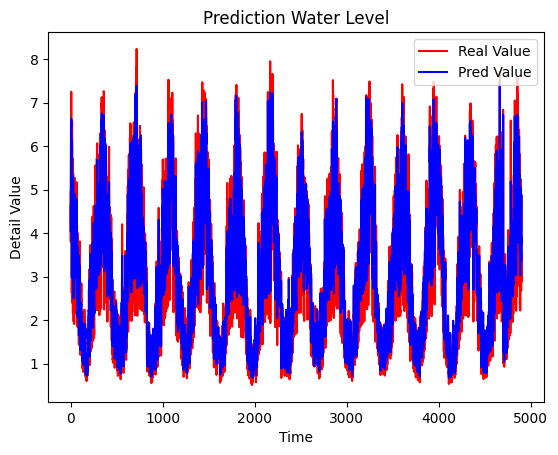

In [41]:
y = np.array(test_data)
y_pred = pred
MSE = mean_squared_error(y, y_pred)
RMSE = math.sqrt(MSE)
# MAE=mean_absolute_error(y, pre)
# MAPE = metrics.mean_absolute_percentage_error(y, pre)
MAE = np.mean(np.abs(y - y_pred))
# MAPE = np.mean(np.abs((y - y_pred) / y))
print("rmse :", RMSE)
print("mae :", MAE)
# print("mape :", MAPE)
print('R² :', r2(y, y_pred))
plt.plot(y, color='red', label='Real Value')
plt.plot(y_pred, color='blue', label='Pred Value')
plt.title('Prediction Water Level')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
plt.show()

## Save true and prediction value.

In [42]:
result_save_file_true = pd.DataFrame(y)
# 使用rename方法来重命名列
result_save_file_true = result_save_file_true.rename(columns={0: "True"})
result_save_file_true.to_csv('Result/' + str(n_output) + '_day_RF_true.csv', index_label='Time')
# %%
result_save_file_pred = pd.DataFrame(y_pred)
result_save_file_pred = result_save_file_pred.rename(columns={0: "Pred"})
result_save_file_pred.to_csv('Result/' + str(n_output) + '_day_RF_prediction.csv', index_label='Time')